<a href="https://colab.research.google.com/github/getBrijendra/AWSSagemaker_XgBoostAlgoDeployed/blob/main/TimeSeriesProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.4 MB/s 
     |████████████████████████████████| 49 kB 3.5 MB/s 
     |████████████████████████████████| 45 kB 2.8 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639902 sha256=98b89c44782f15e0f3737920e409b9130285811455476475ab8fd9a2aede5c54
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [2]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

In [3]:
!wget https://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.csv

--2022-04-25 06:11:06--  https://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.csv
Resolving data.giss.nasa.gov (data.giss.nasa.gov)... 129.164.128.233, 2001:4d0:2310:230::233
Connecting to data.giss.nasa.gov (data.giss.nasa.gov)|129.164.128.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12274 (12K) [text/csv]
Saving to: ‘GLB.Ts+dSST.csv’

GLB.Ts+dSST.csv     100%[===================>]  11.99K  --.-KB/s    in 0s      

2022-04-25 06:11:06 (158 MB/s) - ‘GLB.Ts+dSST.csv’ saved [12274/12274]



In [48]:
df = pd.read_csv('./data/sample.csv', skiprows=0)
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [49]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [50]:
df = df[['DATE', 'AvgTemp']]
df.info()
df.columns = ['ds', 'y']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1821 non-null   object 
 1   AvgTemp  1821 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.6+ KB


In [51]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0


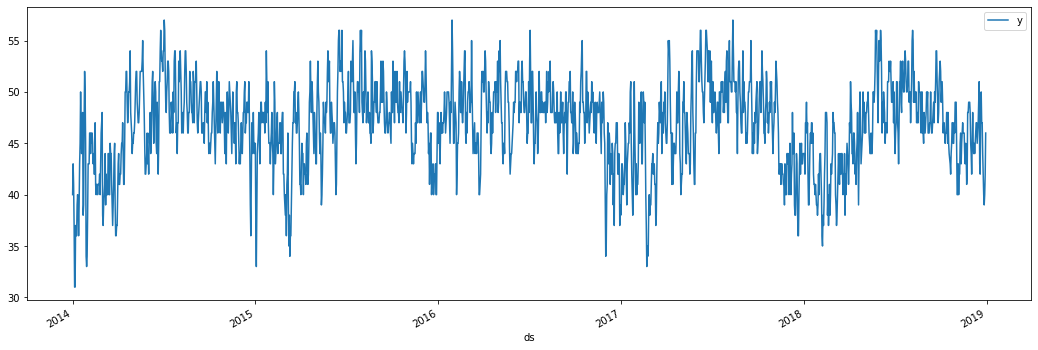

In [52]:
df.plot(x='ds', y='y', figsize=(18,6))

In [53]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-356:]

In [54]:
model = Prophet(daily_seasonality=True)
model.fit(train)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [55]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,40.769404,35.059971,43.445480,40.769404,40.769404,-1.364421,-1.364421,-1.364421,3.201927,...,-0.052888,-0.052888,-0.052888,-4.513459,-4.513459,-4.513459,0.0,0.0,0.0,39.404983
1,2014-01-02,40.782962,35.423117,43.926076,40.782962,40.782962,-1.067533,-1.067533,-1.067533,3.201927,...,0.098595,0.098595,0.098595,-4.368054,-4.368054,-4.368054,0.0,0.0,0.0,39.715429
2,2014-01-03,40.796520,36.045617,44.564023,40.796520,40.796520,-0.573136,-0.573136,-0.573136,3.201927,...,0.426868,0.426868,0.426868,-4.201931,-4.201931,-4.201931,0.0,0.0,0.0,40.223385
3,2014-01-04,40.810078,35.717177,44.442818,40.810078,40.810078,-0.821635,-0.821635,-0.821635,3.201927,...,-0.005889,-0.005889,-0.005889,-4.017673,-4.017673,-4.017673,0.0,0.0,0.0,39.988443
4,2014-01-05,40.823637,35.710021,44.541324,40.823637,40.823637,-0.855341,-0.855341,-0.855341,3.201927,...,-0.239172,-0.239172,-0.239172,-3.818096,-3.818096,-3.818096,0.0,0.0,0.0,39.968295


In [56]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1816,2018-12-25,41.255138,36.633757,45.850388
1817,2018-12-26,41.298107,36.616192,45.567180
1818,2018-12-27,41.427970,36.990418,45.852527
1819,2018-12-28,41.763179,37.629745,46.078282
1820,2018-12-29,41.365825,36.973130,45.894140


In [57]:
test.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


In [58]:
plot_plotly(model, forecast)

In [59]:
plot_components_plotly(model, forecast)

In [60]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-365:]['yhat']

In [61]:
predictions

1456    41.720575
1457    41.583966
1458    41.862901
1459    41.943816
1460    42.201939
          ...    
1816    41.255138
1817    41.298107
1818    41.427970
1819    41.763179
1820    41.365825
Name: yhat, Length: 365, dtype: float64

In [62]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions, test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

ValueError: ignored